In [1]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import rdkit
from rdkit import Chem, DataStructs
from rdkit.Chem import Draw, rdmolops, AllChem, Descriptors


In [2]:
def hist_plot(data, label, xticks, yticks, xlabel, yscale):
    fig, ax = plt.subplots(figsize=(10,6), dpi=300)
    xmax=data[label].max()
    xmin=data[label].min()
    interval=(xmax-xmin)/70.
    n, bins, patches = plt.hist(data[label], bins=np.arange(xmin,xmax,interval)
                                , color='#809bce'
                                , edgecolor='black', linewidth=1.5, density = False )
    ax.tick_params(direction='in', width=2)
    ax.tick_params(axis='x', pad=10)
    ax.tick_params(axis='y', pad=10)
    
    for spine in ax.spines.values():
        spine.set_linewidth(2)
        
    plt.xlabel(xlabel, fontsize=38, font="arial", labelpad=12)
    plt.ylabel('Count', fontsize=38, font="arial", labelpad=12)
    plt.xticks(xticks, fontsize=26)
    plt.yticks(yticks, fontsize=26)
    plt.gca().tick_params(axis='both', length=10, width=2)

#     plt.xlim(xscale[0], xscale[1])
    plt.ylim(yscale[0], yscale[1])
    plt.show()


In [3]:
def svg_plot(foldername, df_contains):
    os.makedirs(foldername, exist_ok=True)

    c_smiles = df_contains['c_smiles'].to_list()
    # len(c_smiles)
    idx_list = df_contains.index.to_list()
    # idx_list[1]

    interval = 40
    # 创建一个绘图选项对象
    options = Draw.MolDrawOptions()
    options.legendFontSize = 30
    for i in range(0,len(c_smiles),interval):
        if (i+interval) <= len(c_smiles):
            sample_smiles = c_smiles[i:i+interval]
        else:
            sample_smiles = c_smiles[i:len(c_smiles)]
        sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
    #     label = idx_list[i:i+40]
        label = list(map(str, idx_list[i:i+40]))
        grid = Draw.MolsToGridImage(sample_mols,
                                   molsPerRow=5,
                                   subImgSize=(700,700),
                                    legends = label,
                                    drawOptions=options,
                                   useSVG=True
                                   )
    # grid
        path = foldername+'/donor-' + str(i+1) +'.svg'
        with open(path, 'w') as f_handle:
            f_handle.write(grid.data)

In [4]:
# 定义一个函数，用于检查每个SMILES字符串是否包含噻吩环
def contains_frag(smiles_string):
    molecule = Chem.MolFromSmiles(smiles_string)
#     ddp = 'CN1C=C2C(=O)N(C)C=C2C1=O'
    fragment_smiles=block_cs
    fragment_molecule = Chem.MolFromSmiles(fragment_smiles)
    return molecule.HasSubstructMatch(fragment_molecule)

In [5]:
df = pd.read_csv('./raw/atom_number_wH_sort_1115-backbone-correction-newSMILES.csv')
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,HOMO(eV),LUMO(eV)
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,-5.20,-3.27
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,-4.90,-3.08
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,-5.34,-3.58
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,-5.15,-3.23
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,-5.11,-3.22
...,...,...,...,...,...,...,...
1110,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,-5.41,-3.73
1111,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,-5.30,-3.65
1112,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,-5.26,-3.60
1113,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,-5.42,-3.90


# sp3-N: tris-phenyl-amine

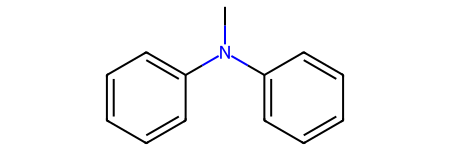

In [6]:
# block = 'C1=CC=C(C=C1)N(C1=CC=CC=C1)C1=CC=CC=C1'
# block = 'S1C=CC=C1N(C1=CC=CS1)C1=CC=CC=C1'
# block = 'S1C=CC=C1N(C1=CC=CC=C1)C1=CC=CC=C1'
# block = 'CC(=C)N(C1=CC=CC=C1)C1=CC=CC=C1'
block = 'CN(C1=CC=CC=C1)C1=CC=CC=C1'
Chem.MolFromSmiles(block) 

In [7]:
block_cs = Chem.CanonSmiles(block)
block_cs

df['block_exist'] = df['newSMILES'].apply(contains_frag)

df_contains = df[df['block_exist']]
df_contains.shape

(18, 8)

In [8]:
sp3N_list = df_contains.index
sp3N_list

Int64Index([  24,   44,  191,  201,  206,  209,  251,  317,  318,  332,  374,
             381,  388,  454,  913,  931,  936, 1006],
           dtype='int64')

In [13]:
c_smiles = df_contains['c_smiles'].values
interval = 40
# 创建一个绘图选项对象
options = Draw.MolDrawOptions()
options.legendFontSize = 50
for i in range(0,len(c_smiles),interval):
    if (i+interval) <= len(c_smiles):
        sample_smiles = c_smiles[i:i+interval]
    else:
        sample_smiles = c_smiles[i:len(c_smiles)]
    sample_mols = [Chem.MolFromSmiles(smiles) for smiles in sample_smiles]
#     label = list(map(str, error_list[i:i+40]))
    label = ['{:d}'.format(x+i+1) for x in range(40)]
#     label = list(map(str, idx_list[i:i+40]))
    grid = Draw.MolsToGridImage(sample_mols,
                               molsPerRow=4,
                               subImgSize=(700,700),
                                legends = label,
                                drawOptions=options,
                               useSVG=True
                               )
grid
path = 'sp3-N.svg'
with open(path, 'w') as f_handle:
        f_handle.write(grid.data)

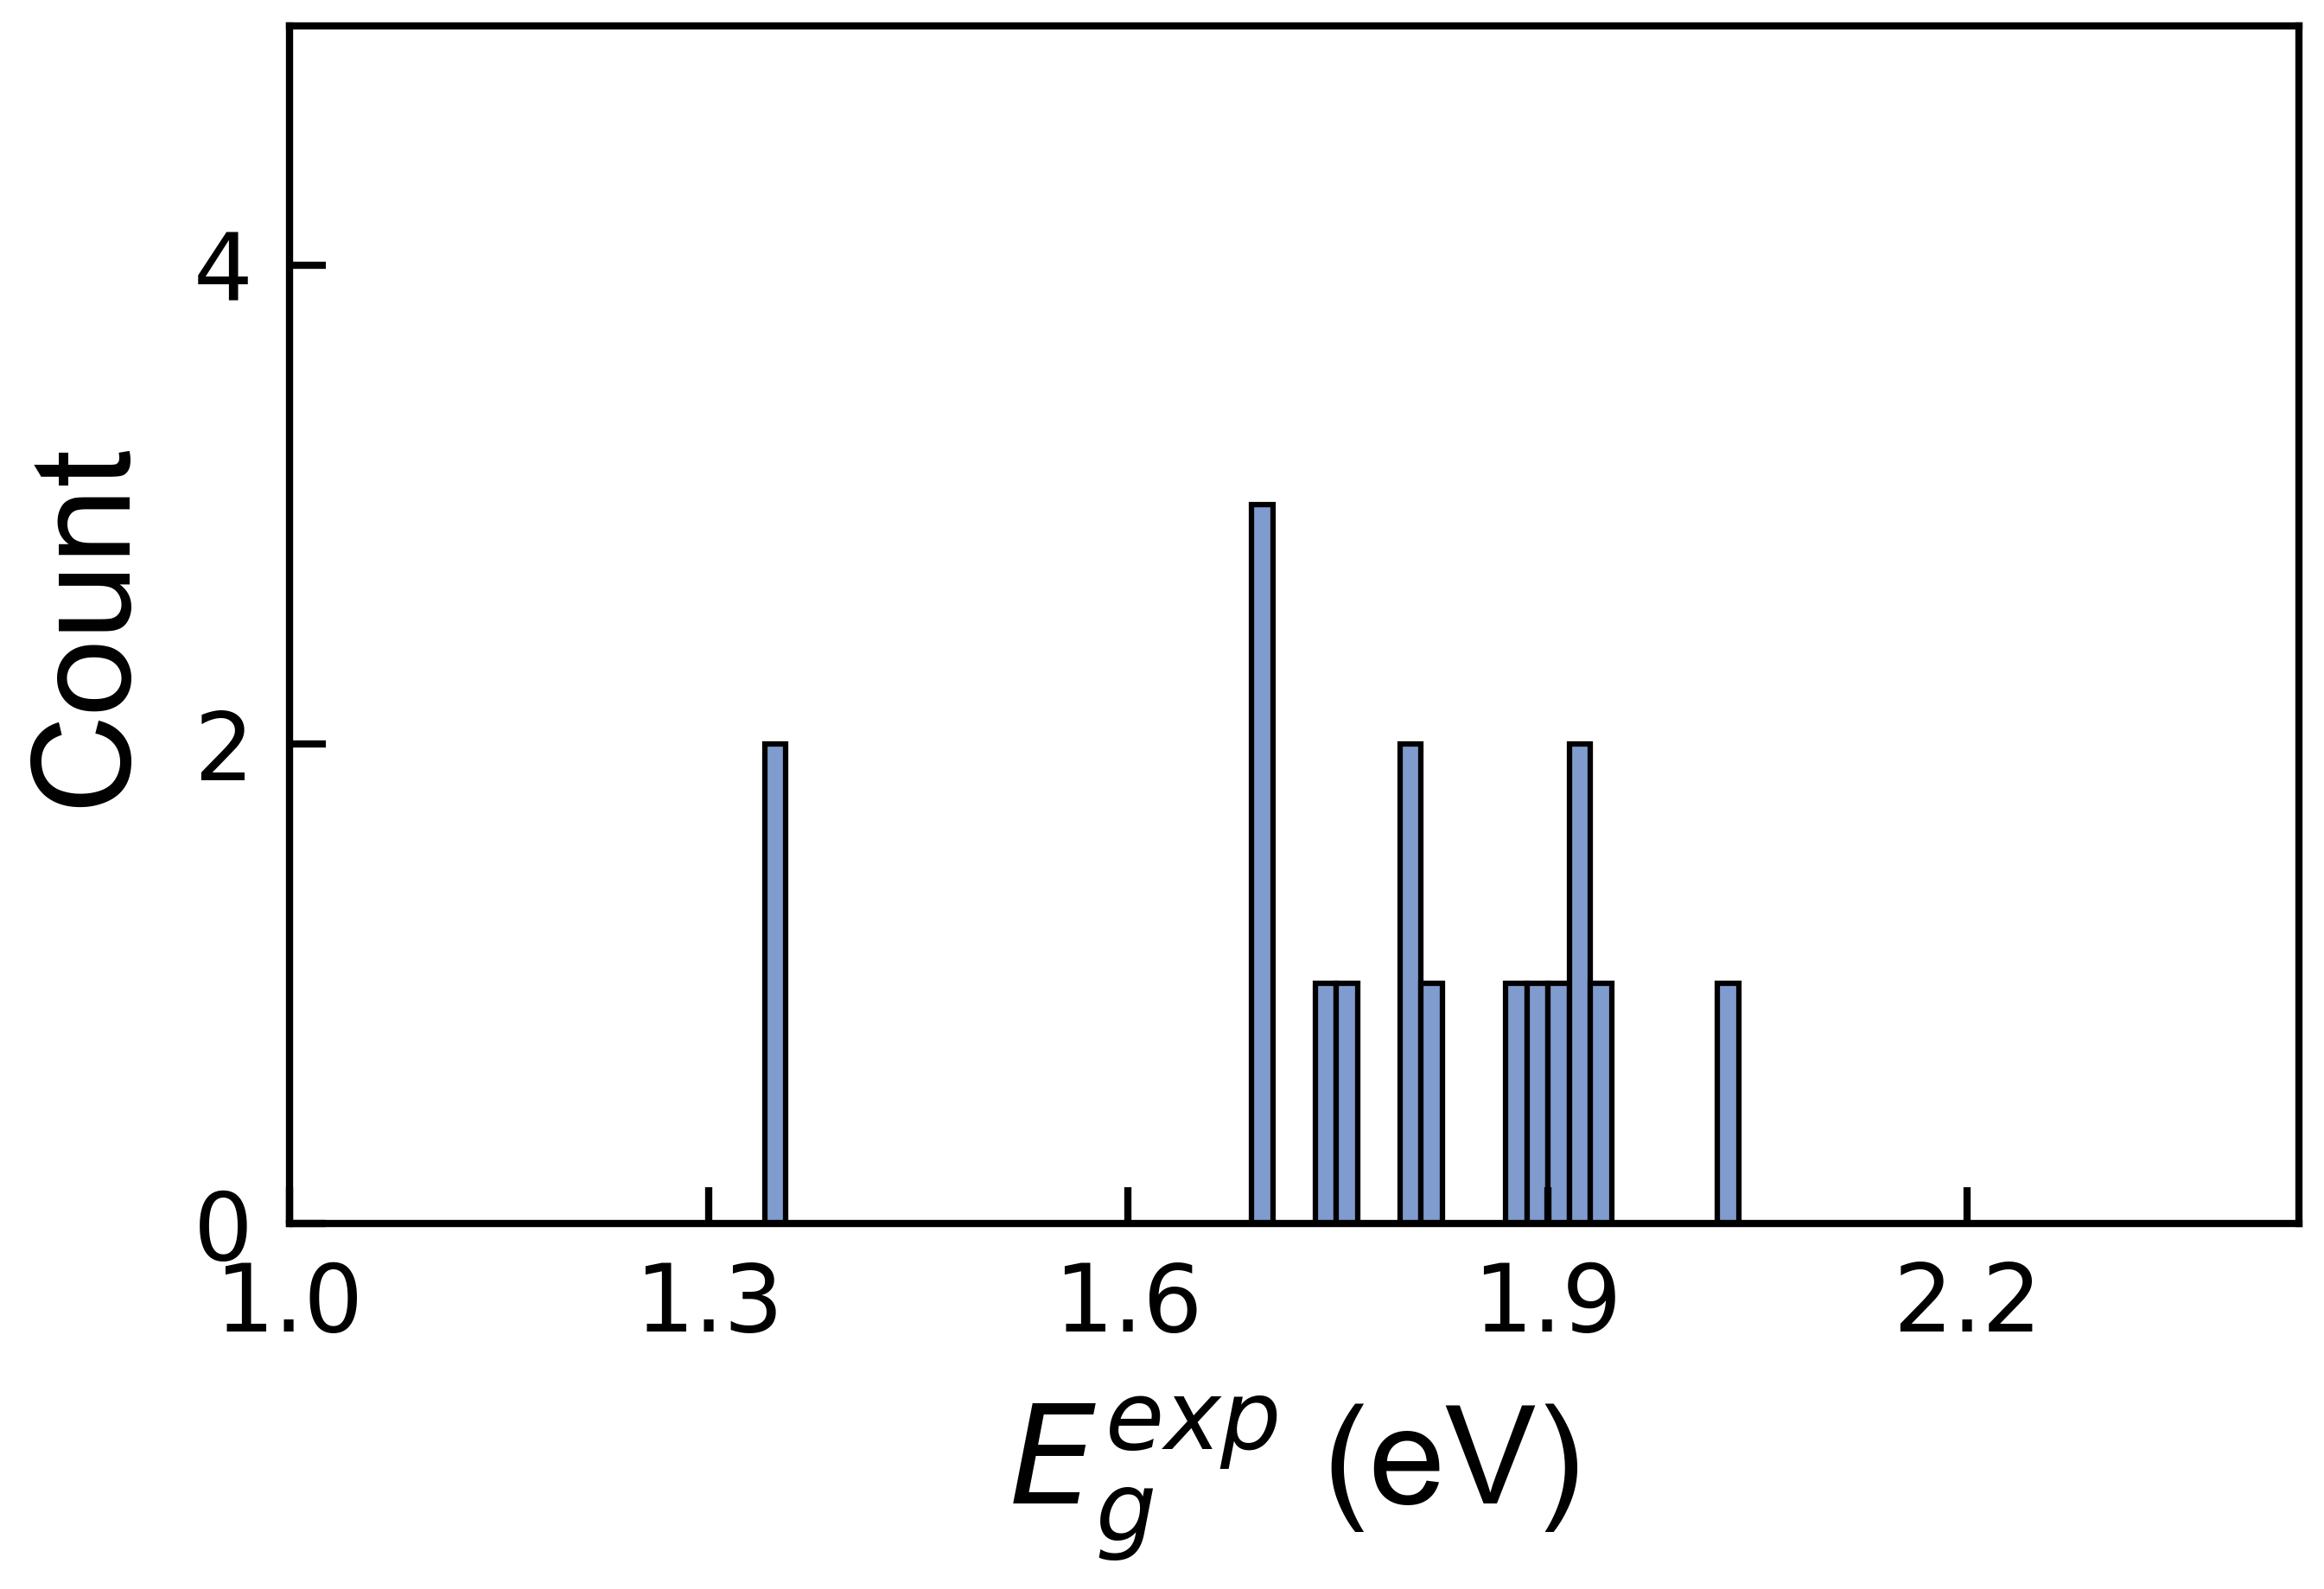

In [10]:
xticks=[1, 1.3, 1.6, 1.9, 2.2]
yticks = [0,2,4]
yscale =[0, 5]
xlabel='$E_{g}^{exp}$ (eV)'
hist_plot(df_contains, 'bandgap(eV)', xticks, yticks, xlabel, yscale)

# drop sp3-N polymers + donor-692

In [12]:
sp3_N_list = [  24,   44,  191,  201,  206,  209,  251,  317,  318,  332,  374,
             381,  388,  454,  913,  931,  936, 1006]
drop_list = sp3_N_list+[691]
print('Total data points: ', 1115-len(drop_list))

Total data points:  1096


In [13]:
df = df[~df.index.isin(drop_list)].reset_index(drop=True)
df

,Nickname,bandgap(eV),c_smiles,newSMILES,Ref.No,block_exist
0,P3HT,1.93,CCCCCCc1cc(C)sc1C,Cc1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C)c(s1)-c1cc(C...,S10,False
1,P3HST,1.82,CCCCCCSc1cc(C)sc1C,CSc1cc(sc1C)-c1sc(cc1SC)-c1sc(cc1SC)-c1sc(cc1S...,S123,False
2,POPT,1.76,CCCCCCCCc1ccc(-c2cc(C)sc2C)cc1,Cc1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c1cc(c(s1)-c...,S126,False
3,PT-C1,1.92,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(C)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1cc(C(=O)OC)c(s1)...,S122,False
4,PT-C2,1.89,CCCCC(CC)COC(=O)c1cc(C)sc1-c1ccc(-c2ccc(C)s2)s1,COC(=O)c1cc(C)sc1-c1ccc(s1)-c1ccc(s1)-c1cc(C(=...,S122,False
...,...,...,...,...,...,...
1091,BTT-NTz,1.68,CCCCCCCCCCCCc1cc(C)sc1-c1cc2c3sc(C(CCCCCCCC)CC...,Cc1cc(C)c(s1)-c1cc2c3sc(C)cc3c3cc(sc3c2s1)-c1s...,S115,False
1092,PIDTI-BT,1.65,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1cc2n(C)c3cc4-c5cc6c(cc5C(c4cc3c2s1)(c1ccccc...,S441,False
1093,PIDTI-DTBT,1.66,CCCCCCCCCCCCC(CCCCCCCCCC)Cn1c2cc3c(cc2c2sc(C)c...,Cc1ccc(s1)-c1ccc(-c2ccc(s2)-c2cc3n(C)c4cc5-c6c...,S441,False
1094,poly(DPP4T-alt-TBP),1.52,CCCCCCCCCCCCC(CCCCCCCCCC)CN1C(=O)C2=C(c3ccc(-c...,CN1C(=O)C2=C(N(C)C(=O)C2=C1c1ccc(C)s1)c1ccc(s1...,S464,False
